In [1]:
import pandas as pd
import numpy as np
import cv2
import tifffile as tiff

#
# Reads band images and index images
#
def read_img():
    data = []

    for i in range(1, 8):
        filename = "input/Landsat8-A/B" + str(i) + "_250.tif"
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        data.append(img)

    index = ["NDVI.tif", "NDWI.tif", "NDBI.tif"]
    for i in index:
        filename = "input/Landsat8-A/" + i
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        data.append(img)

#     cv2.imshow("Image", data[9])
#     cv2.waitKey(0)
    
    return data

#
# Crop and Compute
#
def crop_calc(_img, _pts):
    median = []
    std = []
    w = h = 10

    # iterate over rows with iterrows()
    for index, row in _pts.iterrows():
        # print(index, row['X'], row['Y'])
        
        x = row['X']
        y = row['Y']
        
        #for i, img in enumerate(_img):
        crop_img = _img[y:y+h, x:x+w]
        # cv2.imwrite('output/' + 'water_' +str(i+1) + '.tif', crop_img)
        median.append(np.median(crop_img))
        std.append(np.std(crop_img))
        #break;
            
    return [median, std]

In [2]:
v_pts = pd.read_excel('input/points.xlsx', sheet_name = 'Vegetation')
b_pts = pd.read_excel('input/points.xlsx', sheet_name = 'Built-up')
w_pts = pd.read_excel('input/points.xlsx', sheet_name = 'Water')

In [3]:
def box_plot(_stat, _img, _bndIdx):
    
    filename = 'output/veg_med_std_'
    if(_bndIdx.isdigit()):
        filename += 'b' + _bndIdx
    else:
        filename += _bndIdx
    filename += '.xlsx'        
    
    v_res = crop_calc(_img, v_pts)
    b_res = crop_calc(_img, b_pts)
    w_res = crop_calc(_img, w_pts)
    
    '''
    pd.DataFrame(v_res).to_excel(filename)
    pd.DataFrame(b_res).to_excel(filename)
    pd.DataFrame(w_res).to_excel(filename)
    '''
    
    # median = 0, std = 1
    folder =  "median/" if _stat == 0 else "std/"
    v = v_res[_stat]
    b = b_res[_stat]
    w = w_res[_stat]

    res = [v, b, w]
    res = pd.DataFrame(res)
    result = res.T
    # print(result.head())

    result = result.values.tolist()
    
    title = "median " if _stat == 0 else "std "
    title += "band " + _bndIdx if _bndIdx.isdigit() else _bndIdx 

    df = pd.DataFrame(result, columns=['Veg', 'Built', 'Water'])
    boxplot = df.boxplot(column=['Veg', 'Built', 'Water'])

    fig = boxplot.get_figure()
    fig.suptitle(title)

    fig.show()
    fig.savefig('output/' + folder + title + '.png')


In [4]:
i_img = read_img()

# for i in range(1, 8):
#     print('# median  band ' + str(i))
#     print('box_plot(0, i_img[' + str(i-1) + '], "' + str(i) + '")')

# MEDIAN

In [5]:
# median  band 1
box_plot(0, i_img[0], "1")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


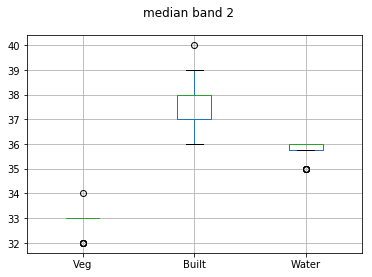

In [6]:
# median  band 2
box_plot(0, i_img[1], "2")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


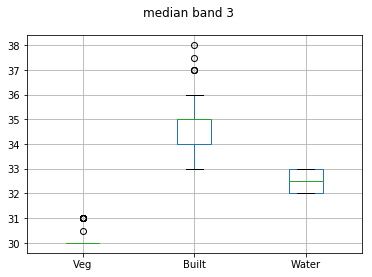

In [7]:
# median  band 3
box_plot(0, i_img[2], "3")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


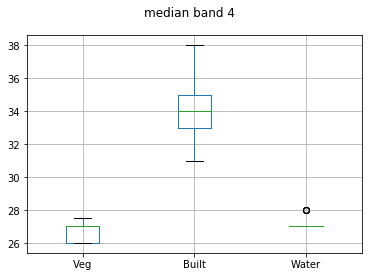

In [8]:
# median  band 4
box_plot(0, i_img[3], "4")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


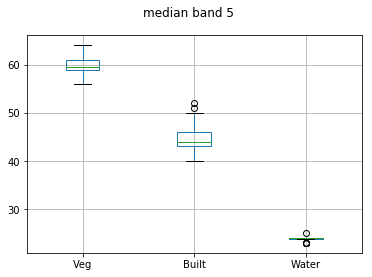

In [9]:
# median  band 5
box_plot(0, i_img[4], "5")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


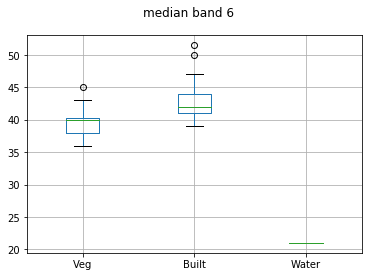

In [10]:
# median  band 6
box_plot(0, i_img[5], "6")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


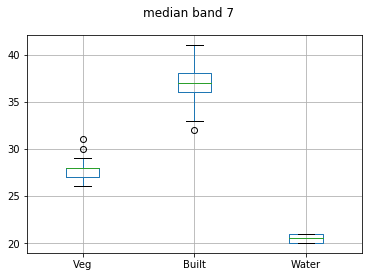

In [11]:
# median  band 7
box_plot(0, i_img[6], "7")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


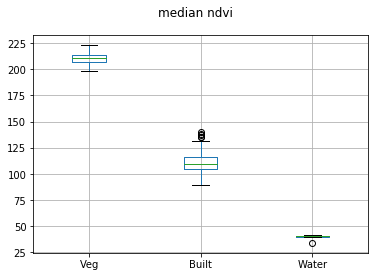

In [12]:
# median  ndvi
box_plot(0, i_img[7], "ndvi")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


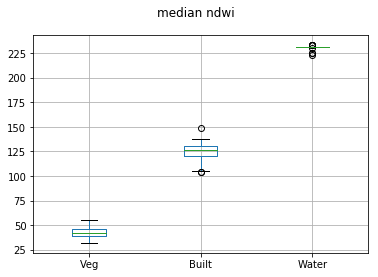

In [13]:
# median  ndwi
box_plot(0, i_img[8], "ndwi")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


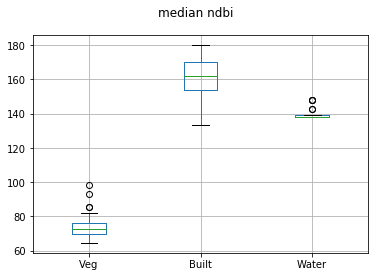

In [14]:
# median  ndbi
box_plot(0, i_img[9], "ndbi")

In [15]:
# for i in range(1, 8):
#     print('# std  band ' + str(i))
#     print('box_plot(1, i_img[' + str(i-1) + '], "' + str(i) + '")')

# Standard Deviation

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


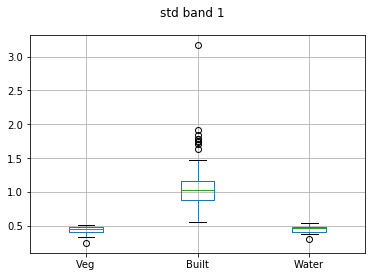

In [16]:
# std  band 1
box_plot(1, i_img[0], "1")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


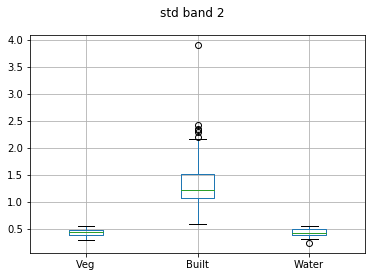

In [17]:
# std  band 2
box_plot(1, i_img[1], "2")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


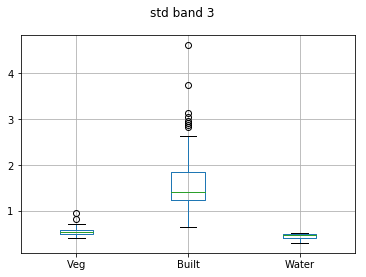

In [18]:
# std  band 3
box_plot(1, i_img[2], "3")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


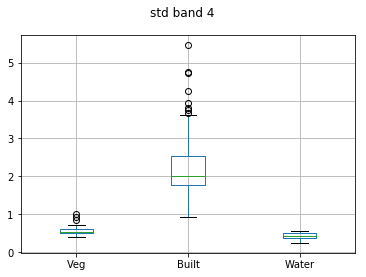

In [19]:
# std  band 4
box_plot(1, i_img[3], "4")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


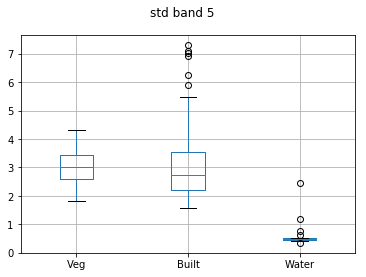

In [20]:
# std  band 5
box_plot(1, i_img[4], "5")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


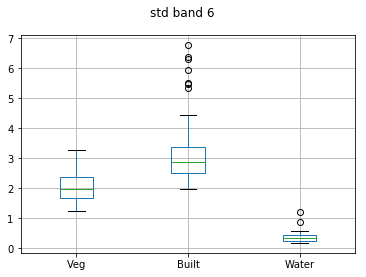

In [21]:
# std  band 6
box_plot(1, i_img[5], "6")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


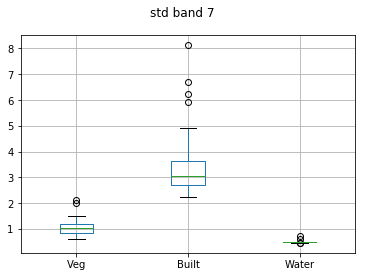

In [22]:
# std  band 7
box_plot(1, i_img[6], "7")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


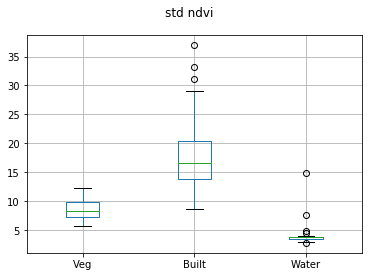

In [23]:
# std  ndvi
box_plot(1, i_img[7], "ndvi")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


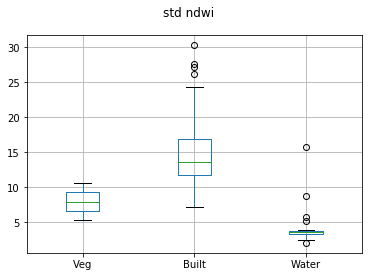

In [24]:
# std  ndwi
box_plot(1, i_img[8], "ndwi")

C:\Users\Abe-r\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


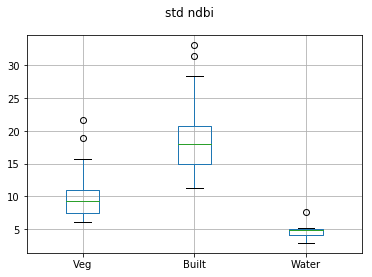

In [25]:
# std  ndbi
box_plot(1, i_img[9], "ndbi")